<a href="https://colab.research.google.com/github/SergeiSa/Extra-math-for-high-school/blob/main/ColabNotebooks/3D_planes_and_lines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple line

Let us draw a line in 3D, going through the origin.

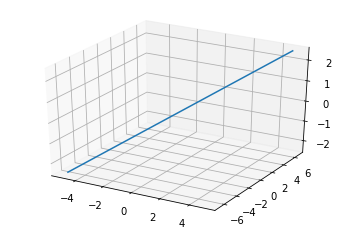

In [1]:
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca as gca
from matplotlib.pyplot import grid as grid

v = np.array([1, 1.3, 0.5])

Count = 100
lambdas = np.linspace(-5.0, 5.0, num=Count)
Points = np.zeros((3, Count))

for i in range(Count):
    Points[:, i] = v*lambdas[i]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(Points[0, :], Points[1, :], Points[2, :])

# ax.set_aspect('equal', 'box')
grid(color='k', linestyle='--', linewidth=0.2)

## Btw lines a re boring-looking, so just for fun...

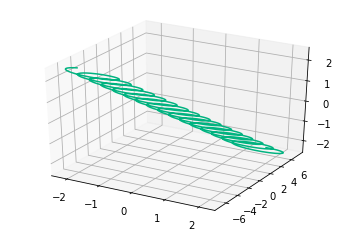

In [14]:
from numpy import sin, cos  

v = np.array([-0.3, -1.3, 0.5])

Count = 1000
lambdas = np.linspace(-5.0, 5.0, num=Count)
Points = np.zeros((3, Count))

w = 100
for i in range(Count):
    g = 0.7*np.array([sin(i*w / Count), cos(i*w / Count), 0.])
    Points[:, i] = v*lambdas[i] + g

fig = plt.figure()
ax = plt.axes(projection='3d')

mycolor = np.array([0.0, 0.7, 0.5])
ax.plot3D(Points[0, :], Points[1, :], Points[2, :], linewidth=1.5, color = mycolor)

# ax.set_aspect('equal', 'box')
grid(color='k', linestyle='--', linewidth=0.2)

Try to make it interactive!

# Cross product

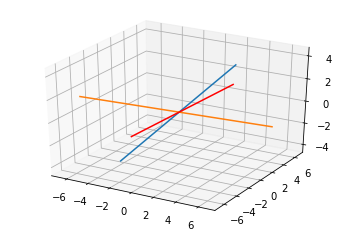

In [15]:
from numpy import cross

a = np.array([-0.3, -1.3, -0.5])
b = np.array([-1, -1.3, 0.5])
c = cross(a, b)

Count = 100
lambdas = np.linspace(-5.0, 5.0, num=Count)
PointsA = np.zeros((3, Count))
PointsB = np.zeros((3, Count))
PointsC = np.zeros((3, Count))

for i in range(Count):
    PointsA[:, i] = a*lambdas[i]
    PointsB[:, i] = b*lambdas[i]
    PointsC[:, i] = c*lambdas[i]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(PointsA[0, :], PointsA[1, :], PointsA[2, :])
ax.plot3D(PointsB[0, :], PointsB[1, :], PointsB[2, :])
ax.plot3D(PointsC[0, :], PointsC[1, :], PointsC[2, :], color='r')

grid(color='k', linestyle='--', linewidth=0.2)

Note, the aspect ratio is not right, and there is a matter of 3D scene projected on the 2D screen - in short, what you see doesn't look orthogonal, and for a good reason.

# How to generate a random orthonormal basis in 3D

...by which we mean - how to generate 3 vectors in 3D, such that each pair would be orthogonal.

In [16]:
from scipy.linalg import null_space, orth
from numpy import dot, round

V = np.random.randn(3, 3)
V = orth(V)

print(round(dot(V[:, 0], V[:, 1]), 2))
print(round(dot(V[:, 1], V[:, 2]), 2))
print(round(dot(V[:, 2], V[:, 0]), 2))

-0.0
0.0
0.0


In [4]:
from scipy.linalg import null_space
from numpy import dot, round

a = np.random.randn(3, 1)
N = null_space(a.T) #creates two vectors orthogonal to each other and to z
V = np.concatenate((a, N), axis=1)

# V = np.random.randn(3, 3)
# V = orth(V)

print(round(dot(V[:, 0], V[:, 1]), 2))
print(round(dot(V[:, 1], V[:, 2]), 2))
print(round(dot(V[:, 2], V[:, 0]), 2))

-0.0
0.0
0.0


# Draw a plane

$-0.3 x + 0.3 y - 0.5 z = 0$

Remember that its normal is:

$\mathbf a = \begin{bmatrix} -0.3 \\ 0.3 \\ -0.5 \end{bmatrix}$

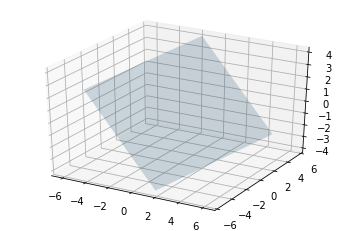

In [5]:
from scipy.linalg import null_space
from numpy import dot, round
from numpy.linalg import norm

a = np.array([[-0.3], [0.3], [-0.5]])
# a = a / norm(a)
N = null_space(a.T) #creates two vectors orthogonal to each other and to a
# V = np.concatenate((a, N), axis=1)

Count = 20
lambdas = np.linspace(-5.0, 5.0, num=Count)
PlaneX = np.zeros((Count, Count))
PlaneY = np.zeros((Count, Count))
PlaneZ = np.zeros((Count, Count))

for i in range(Count):
    for j in range(Count):
        point = N[:, 0]*lambdas[i] + N[:, 1]*lambdas[j]
        PlaneX[i, j] = point[0]
        PlaneY[i, j] = point[1]
        PlaneZ[i, j] = point[2]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(PlaneX, PlaneY, PlaneZ, alpha=0.2)

grid(color='k', linestyle='--', linewidth=0.2)


We know that point $\mathbf p = \begin{bmatrix} 1 \\ 1 \\ 0 \end{bmatrix}$ lies on the plane $\mathcal P$. Lets find its local coordinates on the plane, using its two vectors $\mathbf n_1$, $\mathbf n_2$, concatenated as $\mathbf N = [\mathbf n_1, \mathbf n_2]$.

Remember that it can be done as:

$$\mathbf s = \mathbf N^+ \mathbf p $$

And if $\mathbf p \in \mathcal P$, then:

$$\mathbf p = \mathbf N \mathbf s$$


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


[[ 1.]
 [ 1.]
 [-0.]]
[[ 1.31]
 [-0.52]]
[[ 1.31]
 [-0.52]]


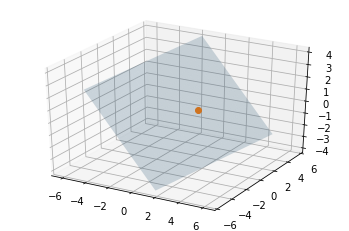

In [23]:
from numpy.linalg import pinv
from numpy.linalg import lstsq


p = np.array([[1], [1], [0.]])
s = pinv(N) @ p
s2, _, _, _ = lstsq(N, p)

# pp = N[:, 0]*s[0] + N[:, 1]*s[1]
pp = N @ s

print(round(pp, 2))


print(round(s, 2))
print(round(s2, 2))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(PlaneX, PlaneY, PlaneZ, alpha=0.2)
ax.plot3D(pp[0], pp[1], pp[2], 'o')

grid(color='k', linestyle='--', linewidth=0.2)

# Distance between a line and a plane

We use horizontal plane and a line parallel to teh plane and passing through the point $\mathbf r = [1, 1, 1]$

In [27]:
# line_vec = 0.7*N[:, 0] + 0.5*N[:, 1]
r = np.array([[10], [10], [1]])

a = np.array([[0], [0], [1]])
# a = a / norm(a)
N = null_space(a.T)
V = np.concatenate((N, a), axis=1)
# s = pinv(V) @ r
s, _, _, _ = lstsq(V, r)

print('Distance:')
print(s[2]) #s[0] because a (normal to the plane) is the first column, hence its index is 0 (~~python)


Distance:
[1.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


Try to invent another example of the plane and a line, where the distance is easy to compute by hand - and check if the method works!

# Plane-line intersection

Find coordinates of a point where plane $-0.3 x + 0.3 y - 0.5 z = 0$ intersects a line defined by vector $\mathbf u = [-0.8, -0.9, -0.5]$ and a point $\mathbf r = [2, -2, -1]$


Text(0.5, 0, 'Y')

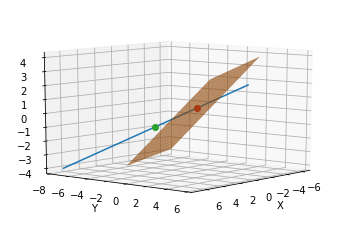

In [31]:
from scipy.linalg import null_space
from numpy import dot, round
from numpy.linalg import norm

a = np.array([[-0.3], [0.3], [-0.5]])
a = a / norm(a)
N = null_space(a.T) #creates two vectors orthogonal to each other and to a
# V = np.concatenate((a, N), axis=1)

u = np.array([[0.8], [-0.9], [-0.5]])
r = np.array([[2], [-2], [-1]])


lambd = -(r.T @ a) / (u.T @ a)
p = lambd * u + r

Count = 20
lincoef_p = np.linspace(-5.0, 5.0, num=Count)
PlaneX = np.zeros((Count, Count))
PlaneY = np.zeros((Count, Count))
PlaneZ = np.zeros((Count, Count))

for i in range(Count):
    for j in range(Count):
        point = N[:, 0]*lincoef_p[i] + N[:, 1]*lincoef_p[j]
        PlaneX[i, j] = point[0]
        PlaneY[i, j] = point[1]
        PlaneZ[i, j] = point[2]


lincoef_l = np.linspace(-6.0, 6.0, num=Count)
PointsLine = np.zeros((3, Count))

for i in range(Count):
    PointsLine[:, i] = np.reshape(u*lincoef_l[i] + r, (3,))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(PointsLine[0, :], PointsLine[1, :], PointsLine[2, :])
ax.plot_surface(PlaneX, PlaneY, PlaneZ, alpha=0.7)

ax.plot3D(r[0], r[1], r[2], 'o')
ax.plot3D(p[0], p[1], p[2], 'o')


grid(color='k', linestyle='--', linewidth=0.2)
ax.view_init(elev=10., azim=40)
plt.xlabel("X")
plt.ylabel("Y")

# Two plane intersection

Text(0.5, 0, 'Y')

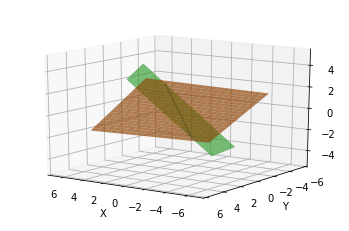

In [9]:
from scipy.linalg import null_space
from numpy import dot, round
from numpy.linalg import norm

a = np.array([[-0.3], [0.3], [-0.5]])
a = a / norm(a)
Na = null_space(a.T) 

b = np.array([[0.3], [0.6], [-0.5]])
b = b / norm(b)
Nb = null_space(b.T) 

u = cross(np.reshape(a, (3, )), np.reshape(b, (3, )))

Count = 20
lincoef_p = np.linspace(-5.0, 5.0, num=Count)
PlaneX1 = np.zeros((Count, Count))
PlaneY1 = np.zeros((Count, Count))
PlaneZ1 = np.zeros((Count, Count))

PlaneX2 = np.zeros((Count, Count))
PlaneY2 = np.zeros((Count, Count))
PlaneZ2 = np.zeros((Count, Count))

for i in range(Count):
    for j in range(Count):
        pointa = Na[:, 0]*lincoef_p[i] + Na[:, 1]*lincoef_p[j]
        PlaneX1[i, j] = pointa[0]
        PlaneY1[i, j] = pointa[1]
        PlaneZ1[i, j] = pointa[2]
        
        pointb = Nb[:, 0]*lincoef_p[i] + Nb[:, 1]*lincoef_p[j]
        PlaneX2[i, j] = pointb[0]
        PlaneY2[i, j] = pointb[1]
        PlaneZ2[i, j] = pointb[2]

lincoef_l = np.linspace(-7.0, 7.0, num=Count)
PointsLine = np.zeros((3, Count))

for i in range(Count):
    PointsLine[:, i] = np.reshape(u*lincoef_l[i], (3,))

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(PointsLine[0, :], PointsLine[1, :], PointsLine[2, :])
ax.plot_surface(PlaneX1, PlaneY1, PlaneZ1, alpha=0.7)
ax.plot_surface(PlaneX2, PlaneY2, PlaneZ2, alpha=0.7)

grid(color='k', linestyle='--', linewidth=0.2)
ax.view_init(elev=15., azim=125)
plt.xlabel("X")
plt.ylabel("Y")

# Self-study

## Task 1

Find cross product of two vectors. Which ones are orthogoinal? Which ones are parallel?



1.   $\mathbf v = [3, \ 0, \ 0]$, $\mathbf u = [0, \ 0, \ 2]$
2.   $\mathbf v = [2, \ 1, \ 1]$, $\mathbf u = [1, \ 4, \ 2]$
3.   $\mathbf v = [-2, \ 5, \ 1]$, $\mathbf u = [0, \ 0,\ 2]$
4.   $\mathbf v = [-5, \ 3, \ 3]$, $\mathbf u = [2, \ -1, \ 2]$
5.   $\mathbf v = [-1, \ 0, \ 1]$, $\mathbf u = [-2, \ -1, \ -2]$
6.   $\mathbf v = \left[0, \ \frac{\sqrt(2)}{2}, \ \frac{\sqrt(2)}{2} \right]$, $\mathbf u = \left[-\frac{\sqrt(2)}{2}, \ \frac{\sqrt(2)}{2}, \ 0\right]$
6.   $\mathbf v = \left[\sqrt(2), \ \sqrt(2), \ 0 \right]$, $\mathbf u = \left[0, \ -\sqrt(2), \ \sqrt(2) \right]$



## Task 2

Find distance between a plane $\rho$ and a point $\mathbf p$:

1.   $\rho = \{ [x,y,z]: 2x-2y+z = 0 \}$, $\mathbf p = [1, 0, 0]$
2.   $\rho = \{ [x,y,z]: 4x-y-z = 0 \}$, $\mathbf p = [1, 3, 0]$
3.   $\rho = \{ [x,y,z]: 5x-y+20z = 0 \}$, $\mathbf p = [0, -2, -2]$
4.   $\rho = \{ [x,y,z]: x-10y+2z = 0 \}$, $\mathbf p = [1, 4, 4]$
5.   $\rho = \{ [x,y,z]: -x-7y-z = 0 \}$, $\mathbf p = [3, 3, 0]$

## Task 3

Find point $\mathbf p$ of intersection between a plane $\rho$ and a line $\mathcal L$ with direction $\mathbf u$ passing through a point $\mathbf r$:

1.   $\rho = \{ [x,y,z]: 2x-2y+z = 0 \}$, 
$\mathbf r = [1, 0, 0]$, $\mathbf u = [1, 1, 0]$
2.   $\rho = \{ [x,y,z]: 4x-y-z = 0 \}$, 
$\mathbf r = [1, 3, 0]$, $\mathbf u = [0, 1, 0]$
3.   $\rho = \{ [x,y,z]: 5x-y+20z = 0 \}$, 
$\mathbf r = [0, -2, -2]$, $\mathbf u = [1, 0, 0]$
4.   $\rho = \{ [x,y,z]: x-10y+2z = 0 \}$, 
$\mathbf r = [1, 4, 4]$, $\mathbf u = [-1, 0, 1]$
5.   $\rho = \{ [x,y,z]: -x-7y-z = 0 \}$, 
$\mathbf r = [3, 3, 0]$, $\mathbf u = [1, -1, 2]$

## Task 4

Find line of intersection between two planes $\rho_1$ and $\rho_2$:

1.   $\rho_1 = \{ [x,y,z]: 2x-2y+z = 0 \}$, 
$\rho_2 = \{ [x,y,z]: -x-4y+2z = 0 \}$;
2.   $\rho_1 = \{ [x,y,z]: -x-10y+10z = 0 \}$, 
$\rho_2 = \{ [x,y,z]: x-2y+3z = 0 \}$;
3.   $\rho_1 = \{ [x,y,z]: 5x-3y+3z = 0 \}$, 
$\rho_2 = \{ [x,y,z]: 6x+4y+7z = 0 \}$;
4.   $\rho_1 = \{ [x,y,z]: 2x-y-z = 0 \}$, 
$\rho_2 = \{ [x,y,z]: -x-y+2z = 0 \}$;
5.   $\rho_1 = \{ [x,y,z]: 20x-y+10z = 0 \}$, 
$\rho_2 = \{ [x,y,z]: -2x-2y+z = 0 \}$;